# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Mounted at ./mount
Drive Mounted


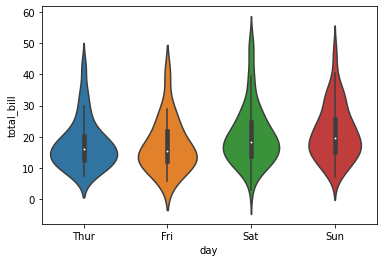

In [1]:
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [2]:
# Load in the dataset
df = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,9.0,6.0,0.0,40,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,20,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,9.0,6.0,0.0,40,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,32786.88525,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,20,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,27777.77778,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,13888.888890,13888.888890,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,20,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,26666.66667,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,13333.333330,13333.333330,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,20,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,41666.66667,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,40,0,41666.666670,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,9.0,6.0,0.0,40,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count',

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [4]:
# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[' Label'])
Y_attack = le.transform(df[' Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2

,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean
0,0.004076,0.001552,0.0,0.000000,0.00000,0.000000,0.0,0.007685,0.533333,3.738318e-08,0.0,3.333333e-08,1.401869e-07,2.500000e-08,2.500000e-08,0.0,2.500000e-08,1.250000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.001015,0.00000,0.222222,0.000000,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00356,0.001552,0.000000,0.001015,0.000518,0.000066,0.00000,0.000000,0.000519,0.000000,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0
1,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005817,0.403670,1.028037e-06,0.0,9.166667e-07,1.130841e-06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.003058,0.004587,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.000458,0.003922,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0
2,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005875,0.407692,4.953271e-07,0.0,4.416667e-07,5.981308e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.006410,0.009615,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.000458,0.003922,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0
3,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005933,0.411765,3.271028e-07,0.0,2.916667e-07,4.299065e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.009804,0.014706,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.000488,0.005035,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0
4,0.004076,0.001552,0.0,0.000000,0.00000,0.000000,0.0,0.007685,0.533333,3.738318e-08,0.0,3.333333e-08,1.401869e-07,2.500000e-08,2.500000e-08,0.0,2.500000e-08,1.250000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.001015,0.00000,0.222222,0.000000,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00356,0.001552,0.000000,0.001015,0.000518,0.000066,0.00000,0.000000,0.000504,0.000000,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005858,0.406557,5.794392e-07,0.0,5.166667e-07,6.822429e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.005464,0.008197,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.004410,0.003876,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0
225741,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005844,0.405556,6.822430e-07,0.0,6.083333e-07,7.850466e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.004630,0.006944,0

### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [5]:
# Output the classes
outcome = df[' Label'].unique()
print(outcome)

['BENIGN' 'DDoS']


In [6]:
# Split data based on identified classes
df2[' Label'] = df[' Label']
benign = df2[df2[' Label'] == outcome[0]]
ddos = df2[df2[' Label'] == outcome[1]]

In [7]:
benign

,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Label
0,0.004076,0.001552,0.0,0.000000,0.00000,0.000000,0.0,0.007685,0.533333,3.738318e-08,0.0,3.333333e-08,1.401869e-07,2.500000e-08,2.500000e-08,0.0,2.500000e-08,1.250000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.001015,0.00000,0.222222,0.000000,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00356,0.001552,0.000000,0.001015,0.000518,0.000066,0.00000,0.000000,0.000519,0.000000,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005817,0.403670,1.028037e-06,0.0,9.166667e-07,1.130841e-06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.003058,0.004587,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.000458,0.003922,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005875,0.407692,4.953271e-07,0.0,4.416667e-07,5.981308e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.006410,0.009615,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.000458,0.003922,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005933,0.411765,3.271028e-07,0.0,2.916667e-07,4.299065e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.009804,0.014706,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.000488,0.005035,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.004076,0.001552,0.0,0.000000,0.00000,0.000000,0.0,0.007685,0.533333,3.738318e-08,0.0,3.333333e-08,1.401869e-07,2.500000e-08,2.500000e-08,0.0,2.500000e-08,1.250000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.001015,0.00000,0.222222,0.000000,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00356,0.001552,0.000000,0.001015,0.000518,0.000066,0.00000,0.000000,0.000504,0.000000,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005858,0.406557,5.794392e-07,0.0,5.166667e-07,6.822429e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.00034,0.005464,0.008197,0.017804,0.000514,0.003098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.142857,0.00356,0.001552,0.001034,0.000508,0.000000,0.000033,0.00034,0.000001,0.004410,0.003876,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,BENIGN
225741,0.004076,0.001552,0.0,0.000514,0.00411,0.001034,0.0,0.005844,0.405556,6.822430e-07,0.0,6.083333e-07,7.850466e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.999999e-08,0.0,0.0,

### Visualise the output

We now have our data split into the classes, so we can use the violin plot for each of our classes independently, and compare the two figures.

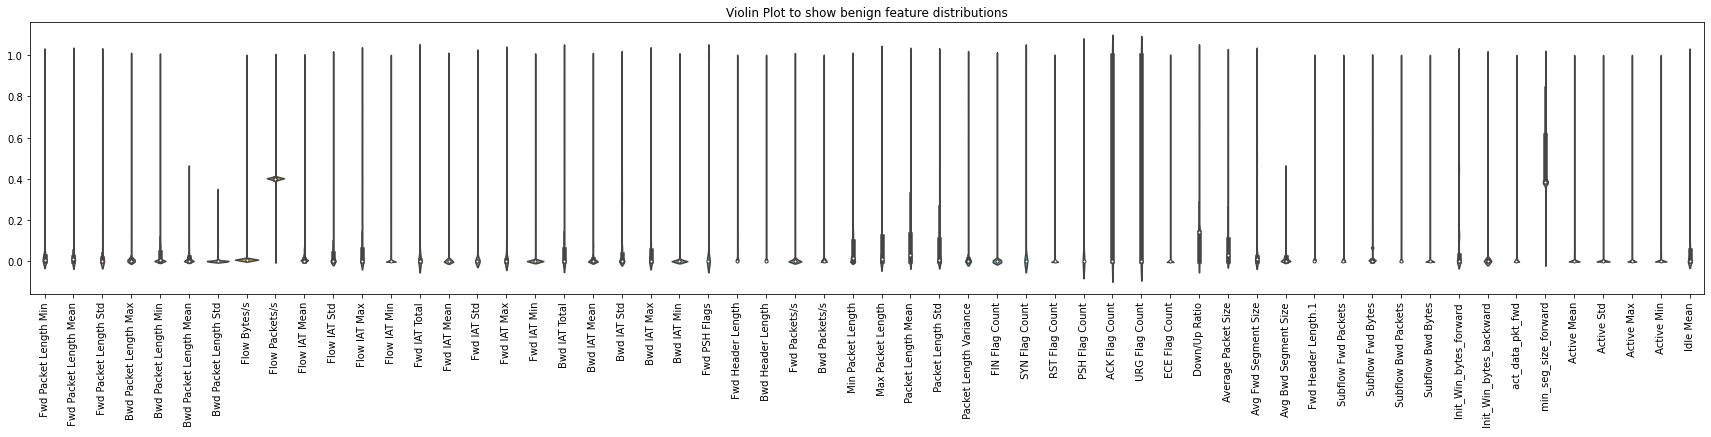

In [8]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=benign)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show benign feature distributions");

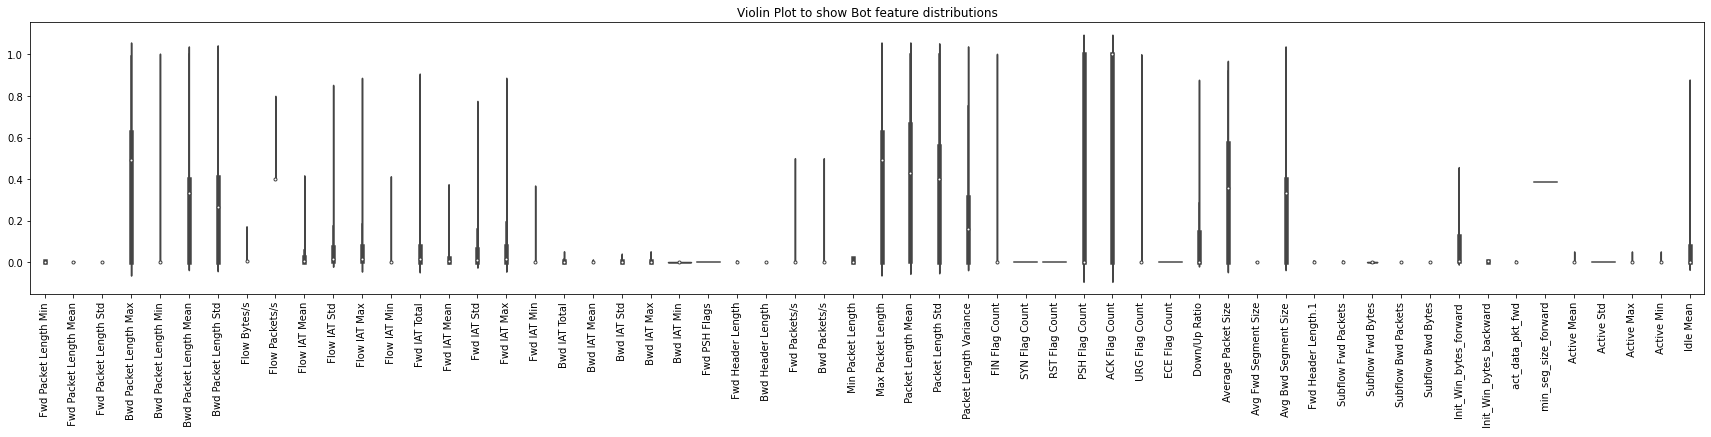

In [9]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ddos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Bot feature distributions");

### Findings

Comparing the two charts, we can see that the following features are different across the two classes.

* Flow Duration
* Flow IAT (Mean, Std, Max, Min)
* Fwd IAT (Total, Mean, Std, Max, Min)
* Packet Length Variance
* Idle (Mean, Std, Max, Min)

We now have a clearer view (as far as this dataset is concerned) with what makes for a benign packet, and what makes for a malicious DDoS packet.

#Adversarial examples



In [10]:
!pip install -q tensorflow==2.0.0b1
# Install bleeding edge version of cleverhans
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

# Import the attack
from cleverhans.future.tf2.attacks import fast_gradient_method

!pip freeze

features = []
accuracys = []
mseerrors = []
minmseerrors = []
test_accuracys = []

num_features = 59

# Transform Objects to Digits
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df2.columns:
        if df2[column_name].dtype == object:
            print(df2[column_name])
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
 
X = df2.iloc[:,0:num_features+1].values
X = X.astype(int)

numpydf2 = np.array(df2)
X_train, X_test, Y_train, Y_test = train_test_split(numpydf2, Y_attack, test_size = 0.7, random_state = 42, stratify=Y_attack)

print ("X_Train:", X_train.shape)
print ("X_Test:", X_test.shape)
print ("Y_Train:", Y_train.shape)
print ("Y_Test:", Y_test.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(Y_class))),
    tf.keras.layers.Activation(tf.nn.softmax)
])

model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Number of features\t  Test accuracy:')
print("{}\t{}".format(num_features, test_acc))
features.append(num_features+1)
accuracys.append(test_acc)
#print("{}\t{}".format(features,accuracys))

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

# Batch run on all test data

CLASS_TO_CHANGE = 1 # 1 will make all true cases appear as false (DDoS -> Benign)

#df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)

X_adv = np.zeros(X_test.shape)

print (X_test.shape)
headers = df2.columns[:80]
printheaders =True
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(Y_test[0])
print(X_test.shape)



for i in range(X_test.shape[0]):
    current_class = Y_test[i]
    #print("Class:", current_class)
    #print(X_test[0,:])
    if current_class == 0:
        example_vals = X_test[i, :]
        example_labels = Y_test[i]
        example_vals = tf.convert_to_tensor(example_vals.reshape((1, num_features)))
        example_labels = np.reshape(example_labels, (1,)).astype('int64')
        epsilon = 0.1
        adv_example_untargeted_label = fast_gradient_method(logits_model, example_vals, epsilon, np.inf, targeted=False)
        adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

        X_adv[i,:] = adv_example_untargeted_label
        X_test[i,:] = adv_example_untargeted_label
        #print (example_labels, "--->", np.argmax(adv_example_untargeted_label_pred))
        #print(X_test[i,:])
        #df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
        ae_ddos_to_benign =pd.DataFrame(X_adv)
        #print(subset.columns)
        #, columns=subset.columns, index=subset.index
        #print(subset.columns)
        #if(printheaders):
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a', header=headers)
        #else: 
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a')
        printheaders = False
        #inverted.to_csv('mount/My Drive/Colab Notebooks/network_data/my_inverted.csv', mode='a', header=headers)
 




     |████████████████████████████████| 87.9MB 72kB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 501kB 52.5MB/s 
     |████████████████████████████████| 3.1MB 37.5MB/s 
  Cloning https://github.com/tensorflow/cleverhans.git to /tmp/pip-install-2_puzz75/cleverhans
  Running command git clone -q https://github.com/tensorflow/cleverhans.git /tmp/pip-install-2_puzz75/cleverhans
     |████████████████████████████████| 163kB 1.7MB/s 
     |████████████████████████████████| 51kB 3.0MB/s 
  Created wheel for cleverhans: filename=cleverhans-3.0.1-cp36-none-any.whl size=262572 sha256=294724ac9a785e6fb91ff165d888bb8b1c34ba0f53de9a9a9c1a21fb02787157
  Stored in directory: /tmp/pip-ephem-wheel-cache-f0e83gqe/wheels/6e/59/ec/723a6f654aaf62c8c40f0f0850fdf71a4948598697f56c3bfa
Successfully built cleverhans


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 


Tensorflow Version: 2.0.0-beta1
Cleverhans Version: 3.0.1-80ec37b63b5b9bd57c94c6d6f2607068
GPU Available:  False
absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.3.1
astor==0.8.1
astropy==4.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.1
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.0
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.4
chainer==7.4.0
chardet==3.0.4
cleverhans==3.0.1
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.8
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2

In [11]:
CLASS_TO_CHANGE = 0 # 0 will make all benign -> DDoS)

X_adv = np.zeros(X_test.shape)

#print (X_test.shape)
#headers = df2.columns[:80]
printheaders =True
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(Y_test[0])
print(X_test.shape)


for i in range(X_test.shape[0]):
    current_class = Y_test[i]
    #print("Class:", current_class)
    #print(X_test[0,:])
    if current_class == 0:
        example_vals = X_test[i, :]
        example_labels = Y_test[i]
        example_vals = tf.convert_to_tensor(example_vals.reshape((1, num_features)))
        example_labels = np.reshape(example_labels, (1,)).astype('int64')
        epsilon = 0.1
        adv_example_untargeted_label = fast_gradient_method(logits_model, example_vals, epsilon, np.inf, targeted=False)
        adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

        X_adv[i,:] = adv_example_untargeted_label
        X_test[i,:] = adv_example_untargeted_label
        #print (example_labels, "--->", np.argmax(adv_example_untargeted_label_pred))
        #print(X_test[i,:])
        #df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
        ae_benign_to_ddos =pd.DataFrame(X_adv)
        #print(subset.columns)
        #, columns=subset.columns, index=subset.index
        #print(subset.columns)
        #if(printheaders):
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a', header=headers)
        #else: 
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a')
        printheaders = False
        #inverted.to_csv('mount/My Drive/Colab Notebooks/network_data/my_inverted.csv', mode='a', header=headers)


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
0
(157998, 59)


# ViolinPlot of AEs


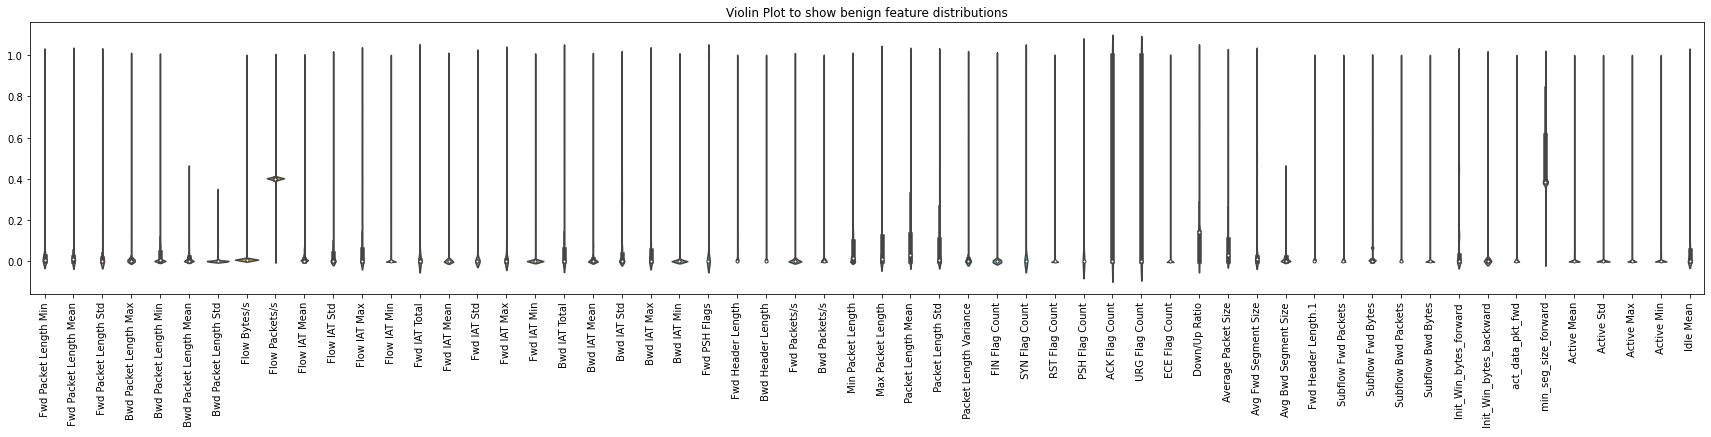

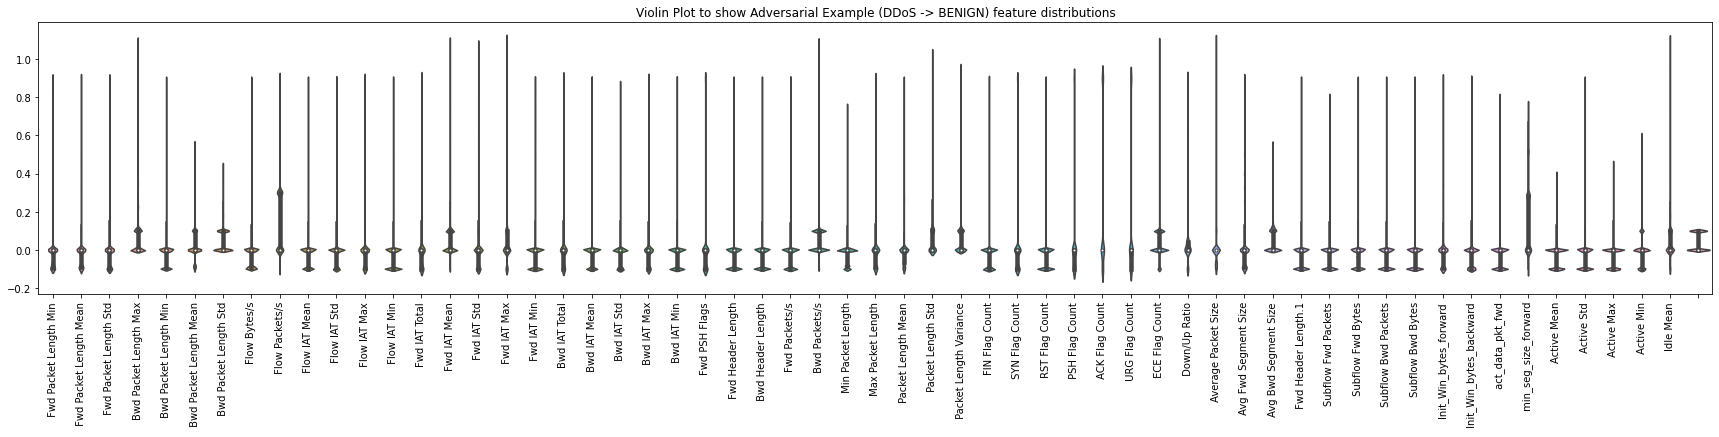

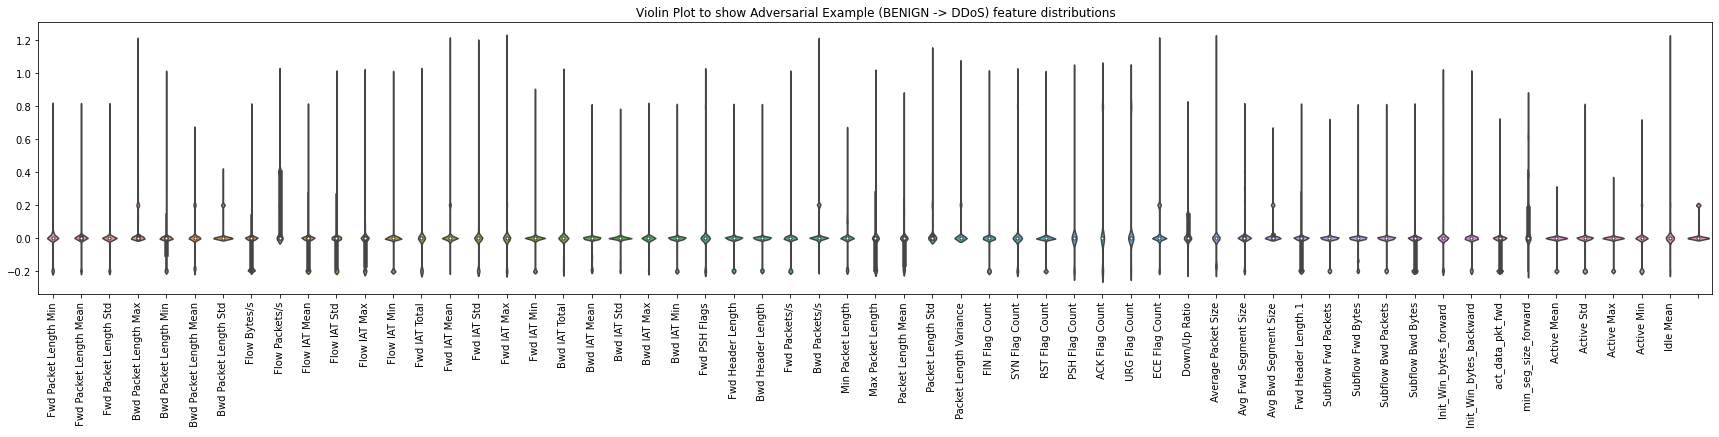

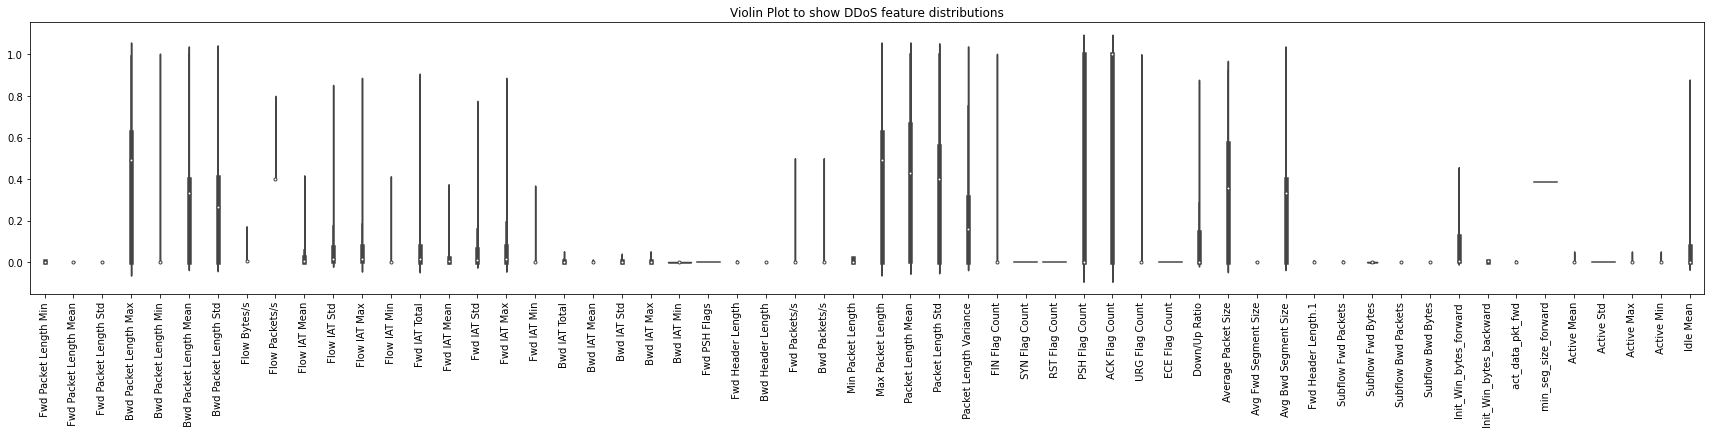

In [12]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=benign)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show benign feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ae_ddos_to_benign)
ax.set_xticklabels(subset.columns, rotation=90);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Adversarial Example (DDoS -> BENIGN) feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ae_benign_to_ddos)
ax.set_xticklabels(subset.columns, rotation=90);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Adversarial Example (BENIGN -> DDoS) feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ddos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show DDoS feature distributions");

### Extra: PCA decomposition to separate classes

Given the high dimensionality of the data, what does the data look like if we perform dimensionality reduction? Can we better separate between the two classes? 

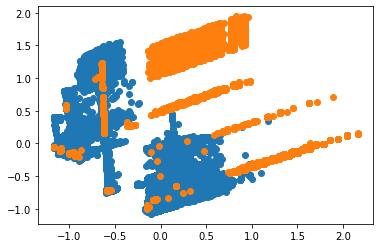

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(df2.values), columns=['x', 'y'])
X['Label'] = df[' Label']

benignX = X[X['Label'] == outcome[0]]
ddosX = X[X['Label'] == outcome[1]]

plt.scatter(benignX['x'], benignX['y'])
plt.scatter(ddosX['x'], ddosX['y'])

***Unfortunately not*** - this is not a great surprise, our violin plot shows overlap between the features of the two classes and there is no clear decision boundary that separates the two. PCA is quite poor when there is little variance in many features (as we have here) hence why the plot has artefacts where straight lines appear. Other methods like t-SNE and UMAP may perform better but at greater computational cost.

#TSNE


In [14]:
TSNE_PLOT=False
if(TSNE_PLOT):
  from sklearn.manifold import TSNE
  import time

  time_start = time.time()
  tsne = TSNE(n_components=2)
  X = pd.DataFrame(tsne.fit_transform(df2.values), columns=['x', 'y'])
  X['Label'] = df[' Label']

  benignX = X[X['Label'] == outcome[0]]
  ddosX = X[X['Label'] == outcome[1]]

  plt.scatter(benignX['x'], benignX['y'])
  plt.scatter(ddosX['x'], ddosX['y'])
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
else:
  print("Skipping TSNE Plot")
  print("Typical TSNE plot time: 54 Mins (3245 seconds)")




Skipping TSNE Plot
Typical TSNE plot time: 54 Mins (3245 seconds)


#UMAP


In [15]:
DO_UMAP = False


import time
import umap.umap_ as umap

if(DO_UMAP):

  time_start = time.time()
  X = pd.DataFrame(umap.fit_transform(df2.values), columns=['x', 'y'])
  X['Label'] = df[' Label']

  benignX = X[X['Label'] == outcome[0]]
  ddosX = X[X['Label'] == outcome[1]]

  plt.scatter(benignX['x'], benignX['y'])
  plt.scatter(ddosX['x'], ddosX['y'])
  print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
else: 
  print("Skipping UMAP Plot")
  print("Typical plot time: Unknown (>54 Mins?)")



Skipping UMAP Plot
Typical plot time: Unknown (>54 Mins?)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    Fwd Packet Length Min  ...                   Label
0               -0.095924  ...  adv_x to appear benign

[1 rows x 59 columns]


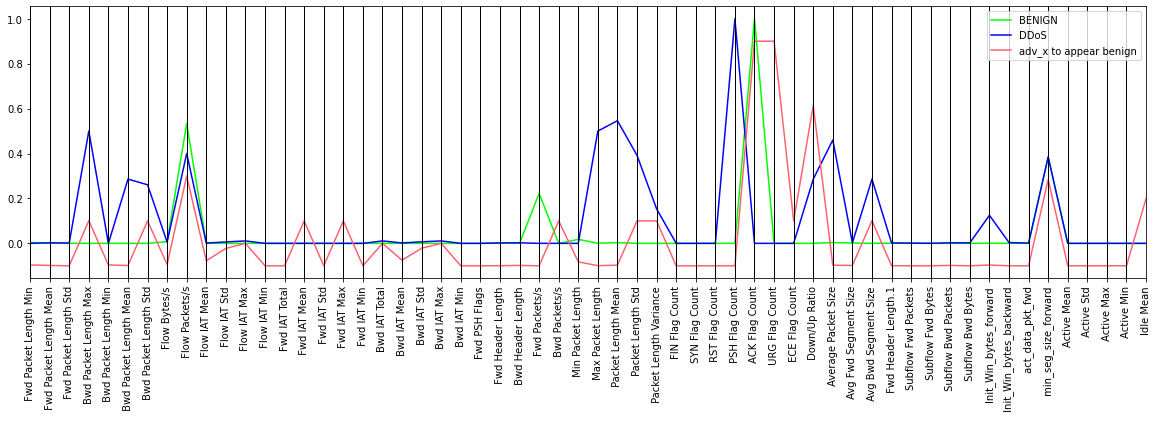

In [16]:
# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']


samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]

benignjust1 = df3[df3[' Label'] == outcome[0]].iloc[0:1,:]

df3 = pd.concat([benign3, ddos3])
df3

ae_ddos_to_benign.columns = ddos.columns

ae_ddos_to_benign[' Label'] ="adv_x to appear benign"

print(ae_ddos_to_benign.iloc[0:1])

plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(benign.iloc[0:1], ' Label', color=('#00FF00'))

ax = pd.plotting.parallel_coordinates(ddos.iloc[0:1], ' Label', color=('#0000FF'))

ax = pd.plotting.parallel_coordinates(ae_ddos_to_benign.iloc[0:1], ' Label', color=('#FF6270'))

ax.yaxis.grid(False) # horizontal lines
ax.xaxis.grid(False) # vertical lines

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Per Feature Difference


Label

 Fwd Packet Length Min      float64
 Fwd Packet Length Mean     float64
 Fwd Packet Length Std      float64
Bwd Packet Length Max       float64
 Bwd Packet Length Min      float64
 Bwd Packet Length Mean     float64
 Bwd Packet Length Std      float64
Flow Bytes/s                float64
 Flow Packets/s             float64
 Flow IAT Mean              float64
 Flow IAT Std               float64
 Flow IAT Max               float64
 Flow IAT Min               float64
Fwd IAT Total               float64
 Fwd IAT Mean               float64
 Fwd IAT Std                float64
 Fwd IAT Max                float64
 Fwd IAT Min                float64
Bwd IAT Total               float64
 Bwd IAT Mean               float64
 Bwd IAT Std                float64
 Bwd IAT Max                float64
 Bwd IAT Min                float64
Fwd PSH Flags               float64
 Fwd Header Length          float64
 Bwd Header Length          float64
Fwd Packets/s               float64
 Bwd Packets/s       

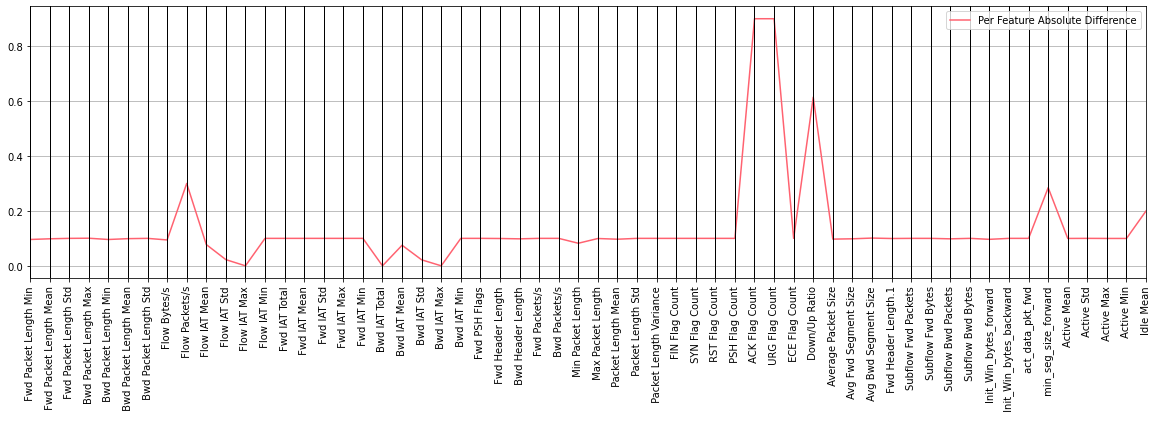

In [17]:
feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
feature_difference[' Label']  = ""
#print(feature_difference.dtypes)


for feature in ddos.columns:
  if( feature == " Label"):
    print("Label\n"); break

  #print(ddos.iloc[0][feature])
  

  feature_difference.columns = ddos.columns
  feature_difference[feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
#print(feature_difference.dtypes)

feature_difference[' Label'] = "Per Feature Absolute Difference"
print(feature_difference.dtypes)
print(feature_difference)
plt.figure(figsize=(20,5))
# Hide grid lines
ax.grid(False)

ax = pd.plotting.parallel_coordinates(feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


#maybe get the mean of each feature and subtract them?

#mean_feature_difference = pd.DataFrame(columns=np.arange(59), dtype=np.dtype("float"))
#mean_feature_difference.columns = ddos.columns
#for feature in ddos.columns:  
#  if( feature == " Label"):
#        print("Label\n"); break   
        
#  #print(ddos.iloc[0][feature])     
#  print(abs(ddos.iloc[0:2][feature].mean().sub(ae_ddos_to_benign.iloc[0:2][feature].mean(), fill_value=0)))

#print(mean_feature_difference)
#plt.figure(figsize=(20,5))
#ax = pd.plotting.parallel_coordinates(mean_feature_difference.iloc[0:1].astype(float), ' Label', color=('#FF6270', '#4ECDC4'))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


## Mean Difference per Feature

Streaming output truncated to the last 5000 lines.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

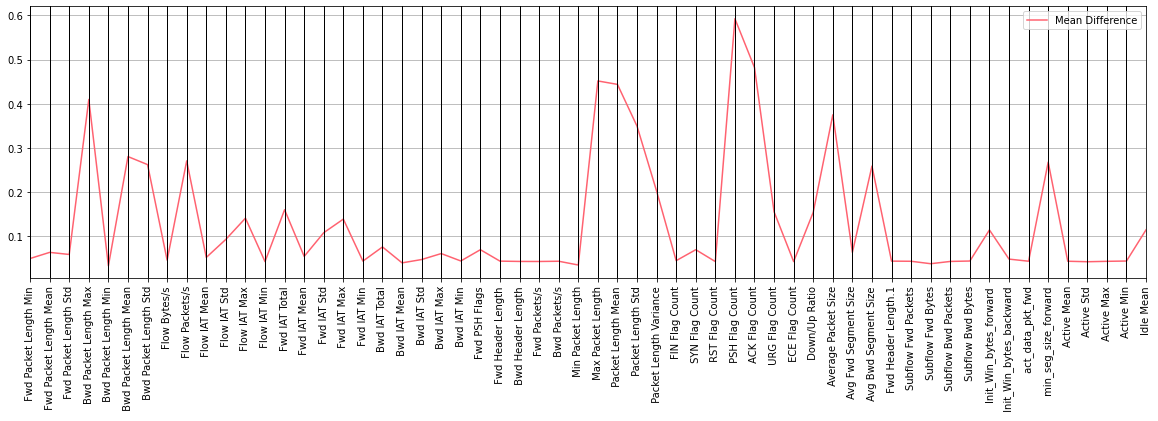

In [18]:
numpy_ddos = ddos.to_numpy(copy=True)
print(numpy_ddos)
print(numpy_ddos.shape)
numpy_ae_ddos_to_benign = ae_ddos_to_benign.to_numpy(copy=True)
print(numpy_ae_ddos_to_benign)

samples = 10000

numpy_difference = np.zeros(shape=(samples,58))
print(numpy_difference)
for row in range(samples):
  for feature_col in range(58):
    pass
    #print(numpy_ddos[row,feature_col])
    numpy_difference[row,feature_col] = abs(numpy_ddos[row,feature_col] - numpy_ae_ddos_to_benign[row,feature_col])


    #new_row[] = abs(ddosrow[ddosfeature] - advxrow[advxfeature])
  print(".") #Done a row\n")
print("Done {} rows\n".format(samples))
print(numpy_difference)

all_features = pd.DataFrame(numpy_difference,dtype=float,copy=True)
all_features[' Label]'] = "Difference"
#print(all_features)
all_features.columns = ddos.columns
#print(all_features)

mean_feature_difference = pd.DataFrame(index=[0],columns=range(59),dtype=np.dtype("float"),)
mean_feature_difference.columns = all_features.columns
for feature in all_features.columns:
  if(feature == ' Label'):
    mean_feature_difference[' Label'] = "Mean Difference"
    break;
  #print(all_features[feature].mean())
  mean_feature_difference[feature] = all_features[feature].mean()
print(mean_feature_difference)
print(mean_feature_difference.shape)


plt.figure(figsize=(20,5))
# Hide grid lines
ax.grid(False)
# Turns off grid on the left Axis.
ax.grid(False)

plt.grid(b=None,which='both',axis='both')


ax = pd.plotting.parallel_coordinates(mean_feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.grid(b=None,which='both',axis='both')


## Find the Biggest Difference


In [19]:
pass
print(mean_feature_difference)
#print(mean_feature_difference[' Label'])
#drop the label
mean_feature_difference = mean_feature_difference.drop(' Label', axis=1)
numpy_mean_feature_difference = mean_feature_difference.to_numpy(copy=True)
list_feature_names = []
list_features_sorted_biggest_difference = []
for column_name in ddos.columns:
  list_feature_names.append(column_name)


print(list_feature_names)



print(numpy_mean_feature_difference.shape)
for feature in range(58):
  print(numpy_mean_feature_difference[0, feature])

for feature in range(58):
  maxvalue = np.argmax(numpy_mean_feature_difference)
  print(maxvalue)
  print(numpy_mean_feature_difference[0,maxvalue])
  print(list_feature_names[maxvalue])
  list_features_sorted_biggest_difference.append(list_feature_names[maxvalue])

  #zero the difference
  numpy_mean_feature_difference[0,maxvalue] = 0.0

print("Sorted, Biggest Feature First")
print(list_features_sorted_biggest_difference)





    Fwd Packet Length Min   Fwd Packet Length Mean  ...  Idle Mean            Label
0                0.049766                 0.063669  ...   0.114782  Mean Difference

[1 rows x 59 columns]
[' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Down/Up Rat

## Find the smallest Difference

In [20]:
pass
print(mean_feature_difference)
#print(mean_feature_difference[' Label'])
#drop the label
#mean_feature_difference = mean_feature_difference.drop(' Label', axis=1)
numpy_mean_feature_difference = mean_feature_difference.to_numpy(copy=True)
list_feature_names = []
list_features_sorted_smallest_difference = []
for column_name in ddos.columns:
  list_feature_names.append(column_name)


print(list_feature_names)



print(numpy_mean_feature_difference.shape)
for feature in range(58):
  print(numpy_mean_feature_difference[0, feature])

for feature in range(58):
  minxvalue = np.argmin(numpy_mean_feature_difference)
  print(minxvalue)
  print(numpy_mean_feature_difference[0,minxvalue])
  print(list_feature_names[minxvalue])
  list_features_sorted_smallest_difference.append(list_feature_names[minxvalue])

  #Now make this a large difference so it's not used again
  numpy_mean_feature_difference[0,minxvalue] = 100.00

print("Sorted, Smallest Feature First")
print(list_features_sorted_smallest_difference)

    Fwd Packet Length Min   Fwd Packet Length Mean  ...   Active Min  Idle Mean
0                0.049766                 0.063669  ...     0.044095   0.114782

[1 rows x 58 columns]
[' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' A

#Parallel CoOrds Plot


Output Table
df.shape
(225711, 69)
ae_ddos_to_benign.shape
(157998, 59)
df.columns
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Pack

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

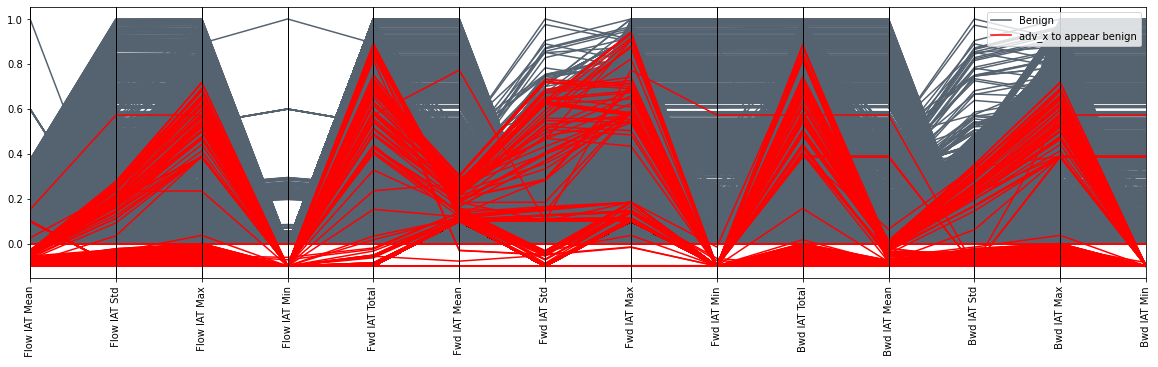

In [21]:


# Load in the dataset
df = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
print("Output Table")
df
print("df.shape")
print(df.shape)
print("ae_ddos_to_benign.shape")
print(ae_ddos_to_benign.shape)
print("df.columns")
print(df.columns)
print("ae_ddos_to_benign.columns")
print(ae_ddos_to_benign.columns)


print(ae_ddos_to_benign.columns)

print(X_adv.shape)

#drop non numerics

# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[' Label'])
Y_attack = le.transform(df[' Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2


print("df2 columns")
print(df2.columns)
print(df2.shape)

print("df2 doesn't have label")
df2[' Label'] = "" #= "NULL"
print("OK set columns to equal df2 columns")

ae_ddos_to_benign.columns = df2.columns

print("done")


samples = 1000
thousand_advx = ae_ddos_to_benign.iloc[0:samples]
print(thousand_advx)
iat_thousand_advx = thousand_advx[ thousand_advx.columns[ thousand_advx.columns.str.contains("IAT") ] ]
iat_thousand_advx[' Label'] ="adv_x to appear benign"


print(iat_thousand_advx)


# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']

# Reread the df 

samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]


df3 = pd.concat([benign3, ddos3])
df3
print(df3.shape)

plot_benign = benign.iloc[0:samples]
plot_benign = benign[ benign.columns[ benign.columns.str.contains("IAT") ] ]
plot_benign[' Label'] = "Benign"


plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(plot_benign, ' Label', color=('#556270', '#4ECDC4'))
ax = pd.plotting.parallel_coordinates(iat_thousand_advx, ' Label', color=('#FF0000', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## END

In [ ]:
#define pandas dataframe to hold all feature differences for each sample


row_count = 0 
all_feature_difference = []
new_row = pd.DataFrame(columns = ddos.columns, dtype=np.dtype("float"))
#all_feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
#all_feature_difference = pd.DataFrame(index=np.arange(len(ddos.index)), columns=np.arange(58), dtype=np.dtype("float"))
#all_feature_difference[' Label']  = ""

#define pandas dataframe for the mean difference
mean_feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
mean_feature_difference[' Label']  = ""

#set the colum names

#all_feature_difference.columns = ddos.columns

for ddosindex, ddosrow in ddos.iterrows():
  for advindex, advxrow in ae_ddos_to_benign.iterrows():
    

      for ddosfeature in ddos.columns:
        if(ddosfeature == ' Label'):
            pass
            #break;

        for advxfeature in ae_ddos_to_benign.columns:
          
            if(ddosfeature == ' Label'):
            
              all_feature_difference.append(new_row)
              row_count = row_count +1
              if((row_count % 1000) == 0):
                print("Done a row: ",row_count)
                print(new_row)
              break;

            #print(advxfeature)
            #print("Difference:")
            if(ddosfeature == advxfeature):

              #print(abs(ddosrow[ddosfeature] - advxrow[advxfeature]))
              new_row[advxfeature] = abs(ddosrow[ddosfeature] - advxrow[advxfeature])
            #new_row[newindex] = abs(ddosrow[feature] - advxrow[advxfeature])
            #print(new_row)
          

    


    #all_feature_difference.loc[row:feature] = abs(ddos.loc[row:feature].astype(float) - ae_ddos_to_benign.loc[row:feature].astype(float))
  
print("Done All Rows!\n")
print(all_feature_difference)




#loop for each feature in each row
for row in range(100): #len(ddos.index)):
  #print("Row: {}".format(row))

  for feature in ddos.columns:
    if( feature == " Label"):
      #print("Label\n"); 
      break

    #print(ddos.iloc[row][feature])
  

    #calculate the absolute difference and store it in the new pandas dataframe
    #all_feature_difference.iloc[row:][feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
    
    all_feature_difference.loc[row,feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
    

    #all_feature_difference.iloc[row:][feature] = abs(ddos.iloc[row:][feature].astype(float).sub(ae_ddos_to_benign.iloc[row:][feature].astype(float), fill_value=0))
    #print(feature_difference.dtypes)
    #print(all_feature_difference.iloc[row:][feature])

print(all_feature_difference)




mean_feature_difference[' Label'] = "Per Feature Absolute Difference"
print(feature_difference.dtypes)
print(feature_difference)
plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

for feature in ddos.columns:
  print(feature)
  mean_feature_difference[feature] = all_feature_difference.mean(column_name=feature)
  print(mean_feature_difference[feature])


Done a row:  1000
Empty DataFrame
Columns: [ Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  ECE Flag Count,  Down/Up Ratio,  Average Packet Size,  Avg Fwd Segment Size,  Avg Bwd Segment Size,  Fwd Header Length.1, Subflow Fwd Packets,  Subflow Fwd Bytes,  Subflow Bwd Packets,  Subflow Bwd Bytes, Init_Win_bytes_forward,  Init_Win_bytes_backward,  a